# **<h3>Algorithms, Pre-Processing, Evaluation Metrics and Results<h3>** 

# 1. Industry-wise AI Adoption Rate 
- Objective: Understand which industries have the highest and lowest AI adoption rates.
- Approach: Use a group-by operation to aggregate data by the 'Industry' column and compute the mean AI adoption rate for each industry.
- Algorithm: Regression
- Pre-processing: Handle missing values in the 'Industry' and 'AI Adoption Rate (%)' columns, standardize industry names if required, and remove outliers if needed.
- Evaluation Metric: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R²), and Adjusted R-squared
- Justification: Grouping and averaging provide a straightforward measure of AI adoption by industry, allowing quick identification of leading and lagging sectors adaptions.

In [64]:
%pip install pandas matplotlib seaborn wordcloud squarify scikit-learn 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [65]:
# Load data
data = pd.read_csv("../Global_AI_Content_Impact_Dataset.csv")

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

# Pre-processing
# Handle missing values
data.dropna(subset=['Industry', 'AI Adoption Rate (%)'], inplace=True)

# Standardize industry names (if needed)
data['Industry'] = data['Industry'].str.strip().str.title()  # Capitalize and remove extra spaces

# Handle outliers (using Z-score for example)
z_scores = np.abs(stats.zscore(data['AI Adoption Rate (%)']))
data = data[z_scores < 3]  # Remove rows with outliers in AI Adoption Rate (%)

# Group by 'Industry' and calculate the mean AI Adoption Rate
industry_ai_adoption = data.groupby('Industry')['AI Adoption Rate (%)'].mean().reset_index()

# Sort industries by AI adoption rate
industry_ai_adoption_sorted = industry_ai_adoption.sort_values(by='AI Adoption Rate (%)', ascending=False)

# Display the results
print("Industries sorted by AI Adoption Rate:")
print(industry_ai_adoption_sorted)


Industries sorted by AI Adoption Rate:
        Industry  AI Adoption Rate (%)
3         Gaming             60.416296
1      Education             57.028235
6  Manufacturing             57.014444
5          Legal             56.077647
2        Finance             55.764286
4     Healthcare             55.734118
0     Automotive             54.887895
7      Marketing             54.244211
9         Retail             47.905714
8          Media             47.263226


In [67]:
# Algorithm: Linear Regression (Optional, if predicting AI Adoption Rate based on other features)
# Let's assume we are predicting AI Adoption Rate (%) based on other features.
# Prepare features and target variable
X = data[[
        'AI-Generated Content Volume (TBs per year)', 
        'Job Loss Due to AI (%)', 
        'Revenue Increase Due to AI (%)', 
        'Human-AI Collaboration Rate (%)', 
        'Consumer Trust in AI (%)'
        ]]
y = data['AI Adoption Rate (%)']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data (example split into training and test sets)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
print(y_pred)

[50.88051142 52.11701039 55.1375592  56.50624667 53.53424871 52.18281402
 56.64539422 55.73835543 55.01041234 55.7298182  60.84016057 57.21016056
 52.33091737 51.66459667 57.19811426 48.77822785 53.33185602 54.33291612
 58.10825495 63.3599322  56.14557102 55.549198   57.623192   54.55844749
 63.34517196 55.86077638 57.69624829 54.72747168 59.46764055 61.15178315
 59.25929177 57.45448005 58.77472457 56.29448219 55.13732951 53.61169257
 50.70793305 59.10619038 50.98837241 54.63699702]


In [68]:
# Evaluate the model using Mean Squared Error (MSE)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 4. R-squared (R²)
r2 = r2_score(y_test, y_pred)

# 5. Adjusted R-squared
n = len(y_test)  # number of samples
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Adjusted R-squared: {adj_r2:.2f}")

Mean Absolute Error (MAE): 22.31
Mean Squared Error (MSE): 667.68
Root Mean Squared Error (RMSE): 25.84
R-squared (R²): -0.05
Adjusted R-squared: -0.20


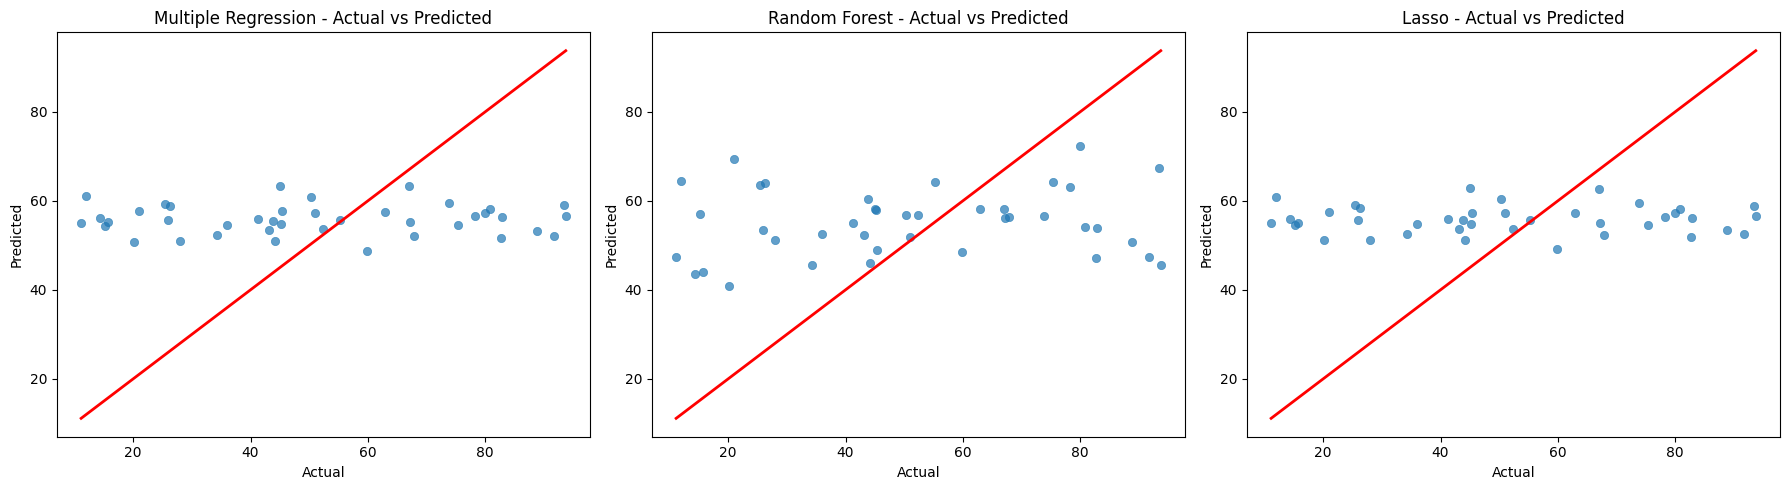

                       MAE     MSE   RMSE    R²  Adj R²
Multiple Regression  22.31  667.68  25.84 -0.05   -0.20
Random Forest        21.24  657.13  25.63 -0.03   -0.18
Lasso                22.29  665.37  25.79 -0.04   -0.20


<Figure size 1200x800 with 0 Axes>

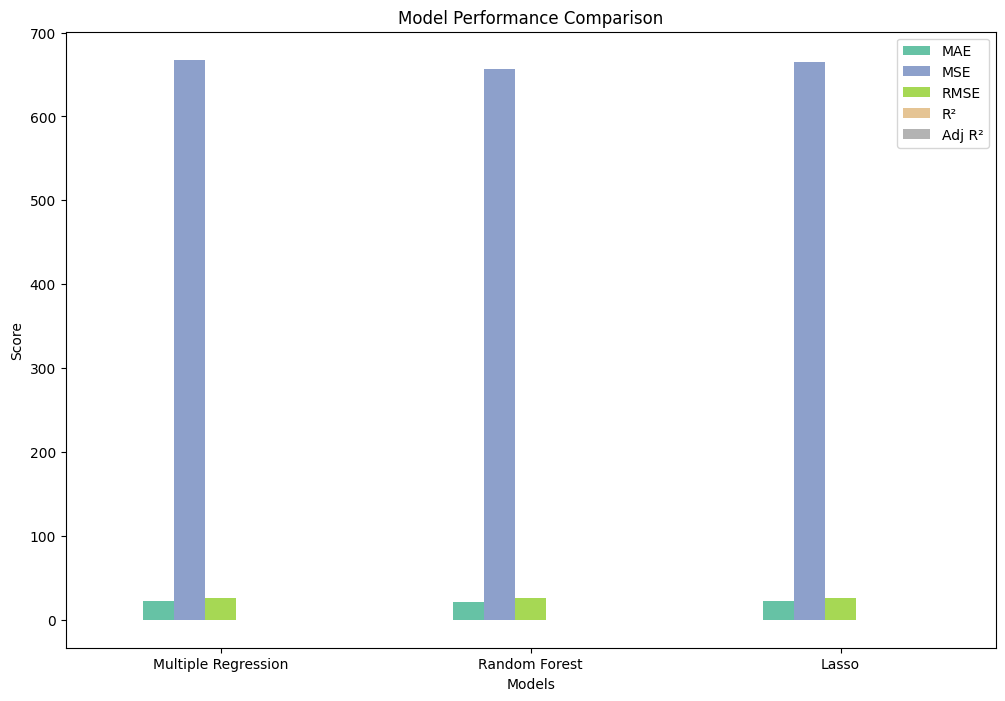


Best Model: Random Forest (R² = -0.03)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

# Pre-processing
# Handle missing values
data.dropna(subset=['Industry', 'AI Adoption Rate (%)'], inplace=True)

data['Industry'] = data['Industry'].str.strip().str.title()

# Handle outliers (using Z-score)
z_scores = np.abs(stats.zscore(data['AI Adoption Rate (%)']))
data = data[z_scores < 3]

X = data[['AI-Generated Content Volume (TBs per year)', 'Job Loss Due to AI (%)', 'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)', 'Consumer Trust in AI (%)']]
y = data['AI Adoption Rate (%)']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'Multiple Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Lasso': Lasso(alpha=0.1, random_state=42)
}

metrics = {}

plt.figure(figsize=(18, 5))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    metrics[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'Adj R²': adj_r2}

    # Scatter plot
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor=None)
    plt.title(f'{name} - Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)

plt.tight_layout()
plt.show()

# Print evaluation metrics
metrics_df = pd.DataFrame(metrics).T.round(2)
print(metrics_df)

# Plot Evaluation Metrics
plt.figure(figsize=(12, 8))
metrics_df.plot(kind='bar', figsize=(12, 8), colormap='Set2', rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.legend(loc='upper right')
plt.show()

# Identify the best model based on R²
best_model = metrics_df['R²'].idxmax()
best_r2 = metrics_df['R²'].max()
print(f"\nBest Model: {best_model} (R² = {best_r2:.2f})")
